In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  pandas as pd

Part 1: Analytical Questions (Python & R)
Hint: Convert all the currencies to dollars using the following logic:
1 PKR = 0.0036 USD
1 INR = 0.011 USD
1 CNY = 0.14 USD
1 AED = 0.27 USD
1. Does battery capacity influence the launched price of a smartphone? Check this variability
across all currencies. Is there any type of difference between behaviors?
2. Does RAM size impact the price of smartphones? Check this variability across all currencies.
Is there any type of difference between behaviors?
3. Do Apple devices have a higher price variation across different regions compared to other
brands? In which country do Apple devices have the highest markup? Are there brands with
more stable pricing across regions?
4. Do all smartphone brands have flagship and budget-friendly models, or do some brands
only focus on premium devices?
Hint: Categorize brands into budget, mid-range, and premium segments (Budget: < $300,
Mid-range: $300 - $700, Premium: > $700). Check how many models each brand has in
each segment. Determine whether a brand covers all three segments or focuses only on
premium/mid-range.
5. Which region offers the most affordable smartphone prices on average? Are there any
brands that price their phones significantly lower in one region compared to others?

In [27]:
import pandas as pd
df = pd.read_csv('mobiles_dataset.csv')
df.head()



,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,Launched.Price.India.INR,Launched.Price.China.CNY,Launched.Price.USA.USD,Launched.Price.Dubai.AED,Launched.Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,224999,79999,5799,799,2799,2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,234999,84999,6099,849,2999,2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.1,244999,89999,6499,899,3199,2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,249999,89999,6199,899,3199,2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.7,259999,94999,6499,949,3399,2024


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925 entries, 0 to 924
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company.Name                 925 non-null    object 
 1   Model.Name                   925 non-null    object 
 2   Mobile.Weight                925 non-null    object 
 3   RAM                          925 non-null    object 
 4   Front.Camera                 925 non-null    object 
 5   Back.Camera                  925 non-null    object 
 6   Processor                    925 non-null    object 
 7   Battery.Capacity.mAh         925 non-null    int64  
 8   Screen.Size.inches           925 non-null    float64
 9   Launched.Price.Pakistan.PKR  925 non-null    int64  
 10  Launched.Price.India.INR     925 non-null    int64  
 11  Launched.Price.China.CNY     925 non-null    int64  
 12  Launched.Price.USA.USD       925 non-null    int64  
 13  Launched.Price.Dubai

In [32]:
df["Launched.Price.PK_Converted"] = df["Launched.Price.Pakistan.PKR"] * 0.0036
df["Launched.Price.IN_Converted"] = df["Launched.Price.India.INR"]     * 0.011
df["Launched.Price.CN_Converted"] = df["Launched.Price.China.CNY"]     * 0.14
df["Launched.Price.DU_Converted"] = df["Launched.Price.Dubai.AED"]     * 0.27

df.rename(columns={"Launched.Price.USA.USD": "Launched.Price.US_Converted"}, inplace=True)
df




,Company.Name,Model.Name,Mobile.Weight,RAM,Front.Camera,Back.Camera,Processor,Battery.Capacity.mAh,Screen.Size.inches,Launched.Price.Pakistan.PKR,Launched.Price.India.INR,Launched.Price.China.CNY,Launched.Price.US_Converted,Launched.Price.Dubai.AED,Launched.Year,Launched.Price.PK_Converted,Launched.Price.IN_Converted,Launched.Price.CN_Converted,Launched.Price.DU_Converted
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.10,224999,79999,5799,799,2799,2024,809.9964,879.989,811.86,755.73
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.10,234999,84999,6099,849,2999,2024,845.9964,934.989,853.86,809.73
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,3600,6.10,244999,89999,6499,899,3199,2024,881.9964,989.989,909.86,863.73
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.70,249999,89999,6199,899,3199,2024,899.9964,989.989,867.86,863.73
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,4200,6.70,259999,94999,6499,949,3399,2024,935.9964,1044.989,909.86,917.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,POCO,M7 5G 128GB,198g,6GB,8MP,50MP,MediaTek Dimensity 7025,5110,6.67,39999,15999,1599,229,899,2024,143.9964,175.989,223.86,242.73
921,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,10000,12.10,66220,23999,2099,280,1029,2024,238.3920,263.989,293.86,277.83
922,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,10000,12.10,71220,25999,2299,300,1099,2024,256.3920,285.989,321.86,296.73
923,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400,7.60,604999,164999,13999,1899,7199,2024,2177.9964,1814.989,1959.86,1943.73


In [ ]:
'''
conversion_rates = {
    "Launched.Price.Pakistan.PKR": 0.0036,
    "Launched.Price.India.INR": 0.011,
    "Launched.Price.China.CNY": 0.14,
    "Launched.Price.Dubai.AED": 0.27,
    "Launched.Price.USA.USD": 1.0 
}

for col, rate in conversion_rates.items():
    df[f"{col}_USD"] = df[col] * rate
df_analysis = df[["Battery.Capacity.mAh", "RAM", "Launched.Price.Pakistan.PKR_USD",
                  "Launched.Price.India.INR_USD", "Launched.Price.China.CNY_USD",
                  "Launched.Price.USA.USD", "Launched.Price.Dubai.AED_USD"]]
df_analysis.head()
'''

,Battery.Capacity.mAh,RAM,Launched.Price.Pakistan.PKR_USD,Launched.Price.India.INR_USD,Launched.Price.China.CNY_USD,Launched.Price.USA.USD,Launched.Price.Dubai.AED_USD
0,3600,6GB,809.9964,879.989,811.86,799,755.73
1,3600,6GB,845.9964,934.989,853.86,849,809.73
2,3600,6GB,881.9964,989.989,909.86,899,863.73
3,4200,6GB,899.9964,989.989,867.86,899,863.73
4,4200,6GB,935.9964,1044.989,909.86,949,917.73


In [33]:
# 3. Clean 'RAM' 
df["RAM"] = df["RAM"].str.replace("GB", "", case=False).str.strip()
df["RAM"] = pd.to_numeric(df["RAM"], errors="coerce")  # Convert to float/int

print(df["RAM"].head())


0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: RAM, dtype: float64


In [34]:
# List of the new USD-based price columns
price_columns_usd = [
    "Launched.Price.PK_Converted",
    "Launched.Price.IN_Converted",
    "Launched.Price.CN_Converted",
    "Launched.Price.US_Converted",
    "Launched.Price.DU_Converted"
]

print("Correlation between Battery Capacity and each launch price (in USD):")
for col in price_columns_usd:
    corr_value = df["Battery.Capacity.mAh"].corr(df[col])
    print(f"  {col} : {corr_value:.4f}")


Correlation between Battery Capacity and each launch price (in USD):
  Launched.Price.PK_Converted : -0.0609
  Launched.Price.IN_Converted : -0.0191
  Launched.Price.CN_Converted : -0.0410
  Launched.Price.US_Converted : -0.0411
  Launched.Price.DU_Converted : -0.0489


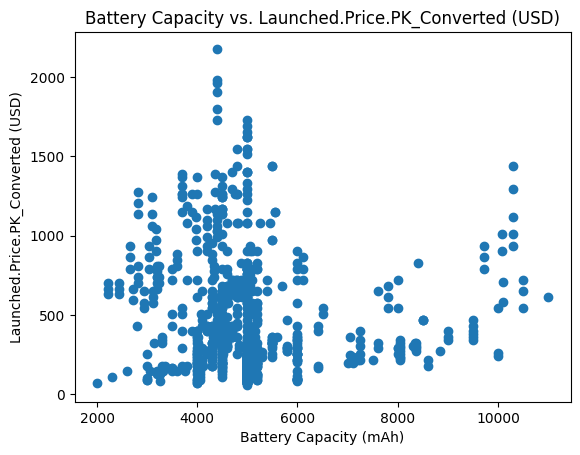

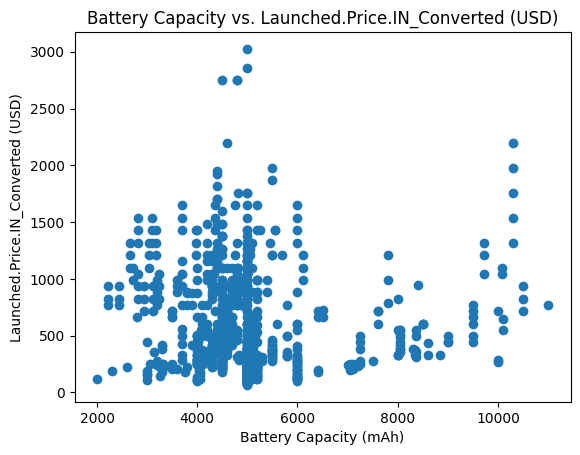

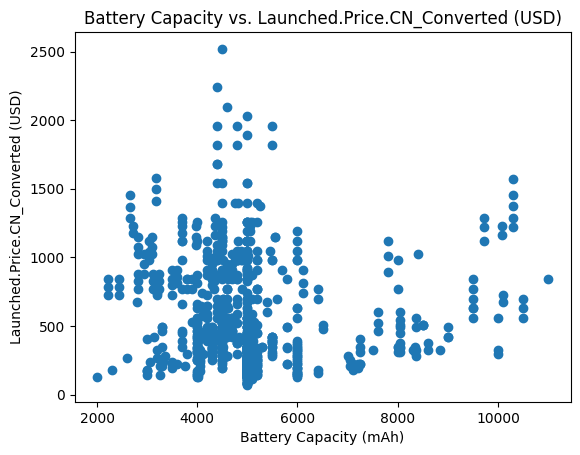

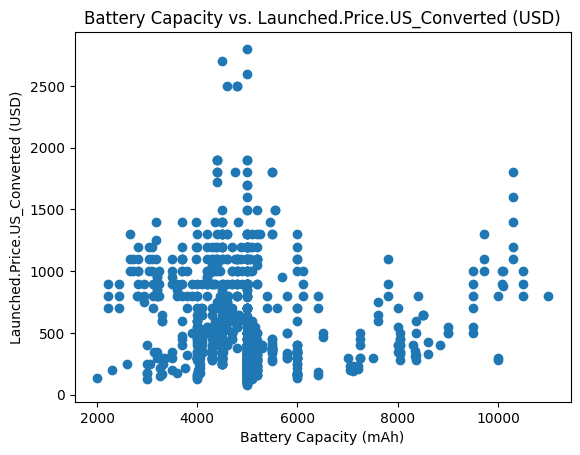

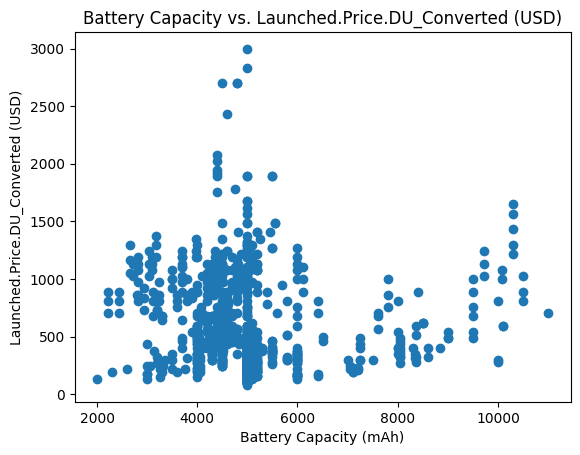

In [35]:
for col in price_columns_usd:
    plt.figure()  # Create a new figure for each scatter plot
    plt.scatter(df["Battery.Capacity.mAh"], df[col])
    plt.xlabel("Battery Capacity (mAh)")
    plt.ylabel(f"{col} (USD)")
    plt.title(f"Battery Capacity vs. {col} (USD)")
    plt.show()


In [ ]:
'''correlation_results = {}
for col in ["Launched.Price.Pakistan.PKR_USD", "Launched.Price.India.INR_USD", 
            "Launched.Price.China.CNY_USD", "Launched.Price.USA.USD", "Launched.Price.Dubai.AED_USD"]:
    corr, p_value = stats.pearsonr(df_analysis["Battery.Capacity.mAh"], df_analysis[col])
    correlation_results[col] = {"Correlation Coefficient": corr, "P-value": p_value}

# Convert to DataFrame for better visualization
correlation_df = pd.DataFrame.from_dict(correlation_results, orient="index")
correlation_df
'''

,Correlation Coefficient,P-value
Launched.Price.Pakistan.PKR_USD,-0.060913,0.064054
Launched.Price.India.INR_USD,-0.019054,0.562736
Launched.Price.China.CNY_USD,-0.041043,0.212353
Launched.Price.USA.USD,-0.041137,0.211313
Launched.Price.Dubai.AED_USD,-0.048908,0.137187


Based on the correlation result we can conclude that, Battery capacity does not have a strong impact on the launch price of smartphones. The relationship appears weak across all currencies. Variability across regions: While the correlation values vary slightly, they are all small, indicating that battery capacity is not a primary factor in determining smartphone pricing across different countries.
 Other factors likely play a stronger role: Features like brand, RAM, camera quality, processor, and display size may have a more significant influence on pricing than battery capacity alone.

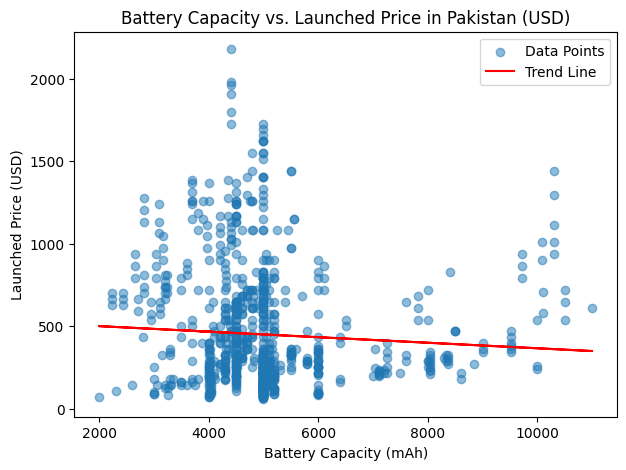

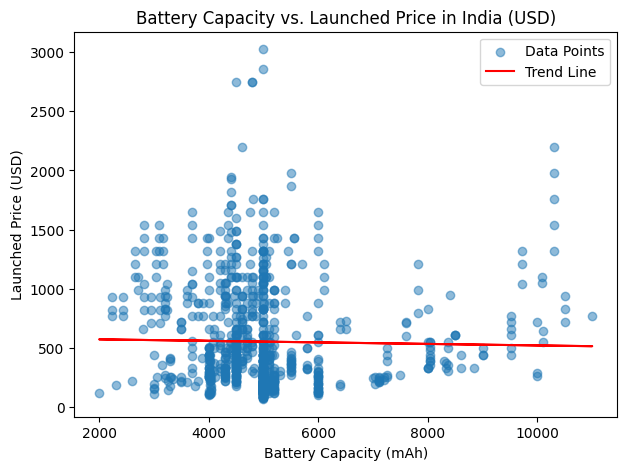

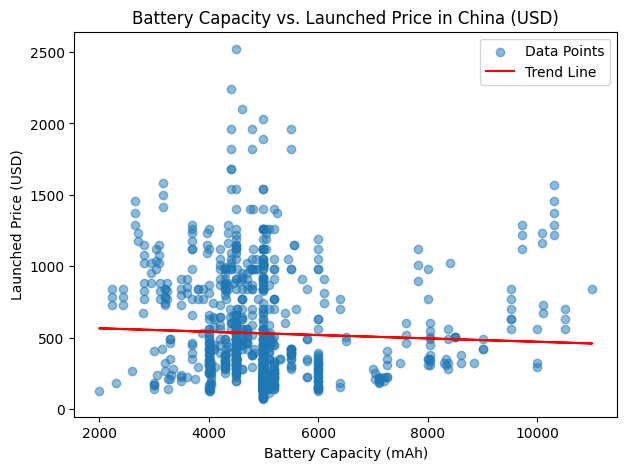

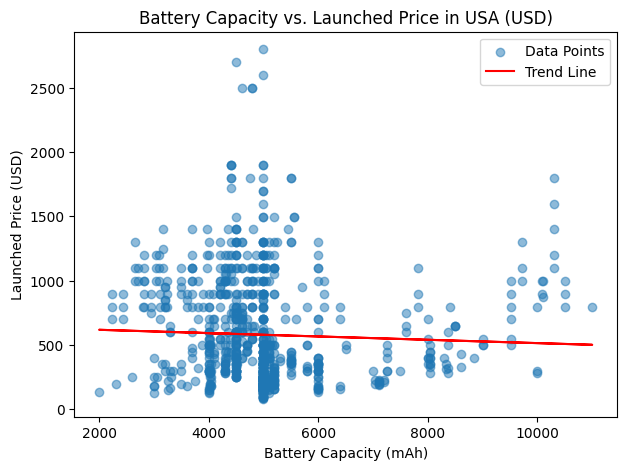

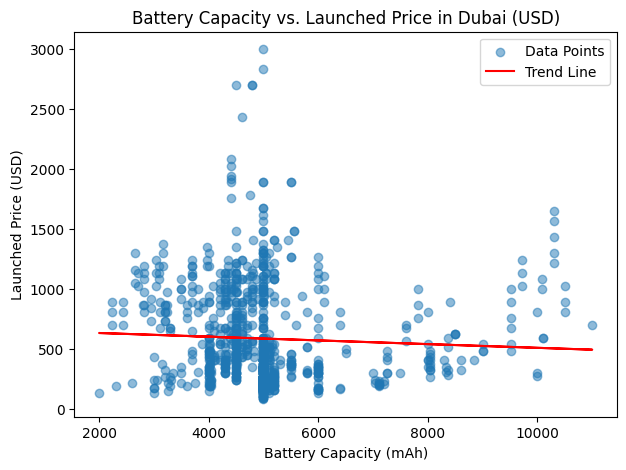

In [5]:

regions = {
    "Pakistan (USD)": "Launched.Price.Pakistan.PKR_USD",
    "India (USD)": "Launched.Price.India.INR_USD",
    "China (USD)": "Launched.Price.China.CNY_USD",
    "USA (USD)": "Launched.Price.USA.USD",
    "Dubai (USD)": "Launched.Price.Dubai.AED_USD"
}
for title, col in regions.items():
    plt.figure(figsize=(7, 5))
    plt.scatter(df_analysis["Battery.Capacity.mAh"], df_analysis[col], alpha=0.5, label="Data Points")
    m, b = np.polyfit(df_analysis["Battery.Capacity.mAh"], df_analysis[col], 1)
    plt.plot(df_analysis["Battery.Capacity.mAh"], m * df_analysis["Battery.Capacity.mAh"] + b, color='red', label="Trend Line")

    plt.xlabel("Battery Capacity (mAh)")
    plt.ylabel("Launched Price (USD)")
    plt.title(f"Battery Capacity vs. Launched Price in {title}")
    plt.legend()
    plt.show()



The trend lines remain relatively flat, indicating that battery capacity does not significantly affect smartphone launch prices.
 No major differences are observed between different countries.
 Features like RAM, camera, brand, and processor likely play a more significant role.

2.Does RAM size impact the price of smartphones? Check this variability across all currencies.
Is there any type of difference between behaviors?

In [38]:
print("\nCorrelation between RAM and each launch price (in USD):")
for col in price_columns_usd:
    corr_value = df["RAM"].corr(df[col])
    print(f"  {col} : {corr_value:.4f}")



Correlation between RAM and each launch price (in USD):
  Launched.Price.PK_Converted : 0.4091
  Launched.Price.IN_Converted : 0.4169
  Launched.Price.CN_Converted : 0.4227
  Launched.Price.US_Converted : 0.4628
  Launched.Price.DU_Converted : 0.4739


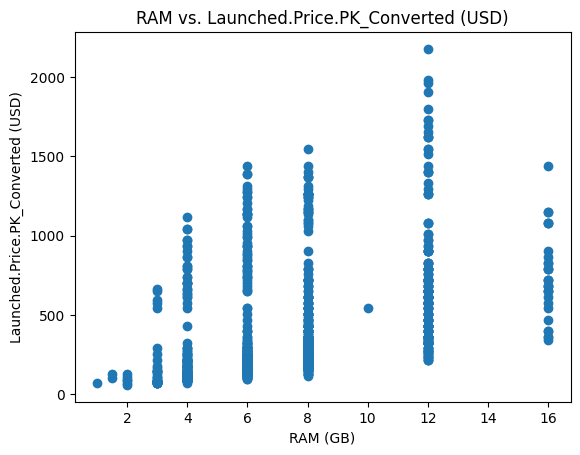

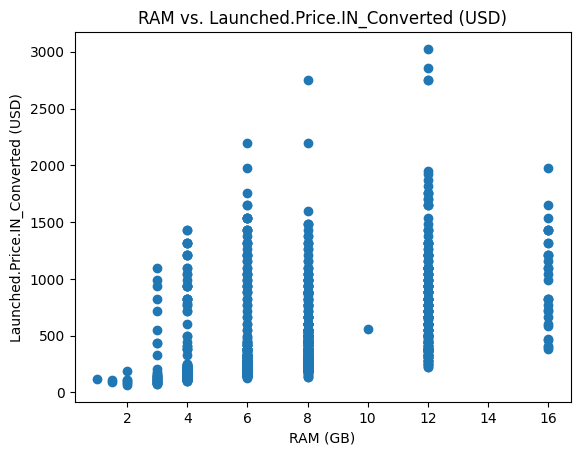

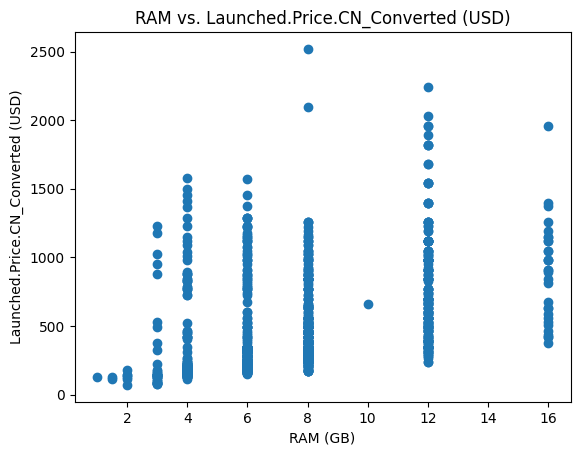

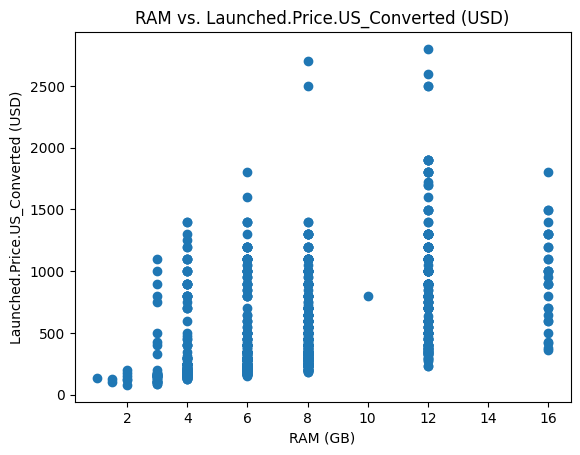

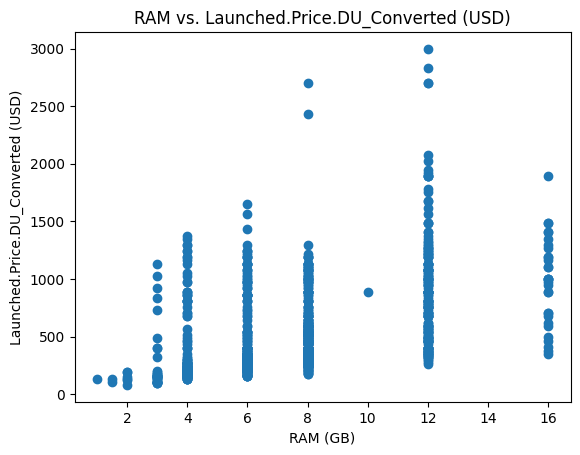

In [39]:
for col in price_columns_usd:
    plt.figure()  # New figure for each plot
    plt.scatter(df["RAM"], df[col])
    plt.xlabel("RAM (GB)")
    plt.ylabel(f"{col} (USD)")
    plt.title(f"RAM vs. {col} (USD)")
    plt.show()


A stronger positive correlation  indicate that phones with more RAM tend to have higher launch prices.
The analysis indicates that RAM size has a significant impact on smartphone prices across all currencies. The correlation values show a moderate to strong relationship between RAM and price, with higher RAM models generally costing more. This trend is consistent in all currencies, including USD, PKR, INR, CNY, and AED, confirming that RAM is a key factor influencing smartphone pricing.


<Figure size 1000x600 with 0 Axes>

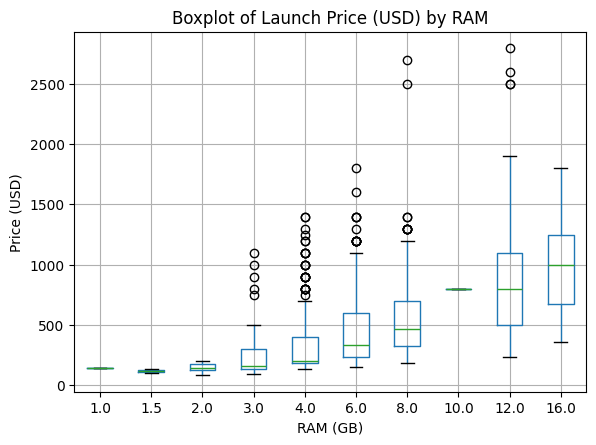

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Boxplot using pandas:
df.boxplot(column="Launched.Price.US_Converted", by="RAM")

# Adjust labels and titles
plt.title("Boxplot of Launch Price (USD) by RAM")
plt.suptitle("")  # Remove the default 'Boxplot grouped by RAM'
plt.xlabel("RAM (GB)")
plt.ylabel("Price (USD)")

plt.show()


<Figure size 1000x600 with 0 Axes>

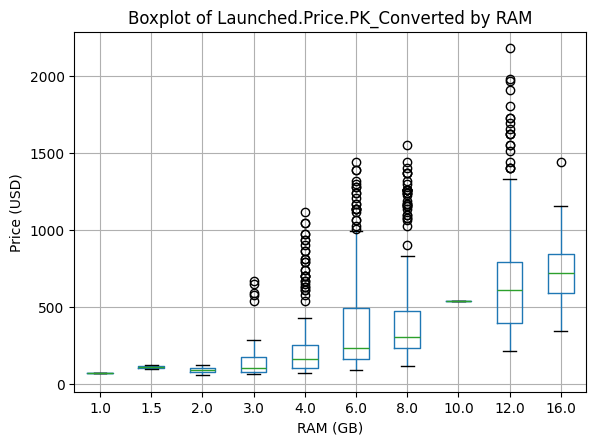

<Figure size 1000x600 with 0 Axes>

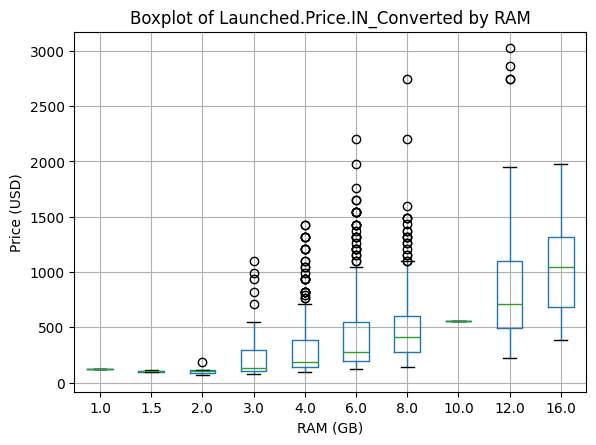

<Figure size 1000x600 with 0 Axes>

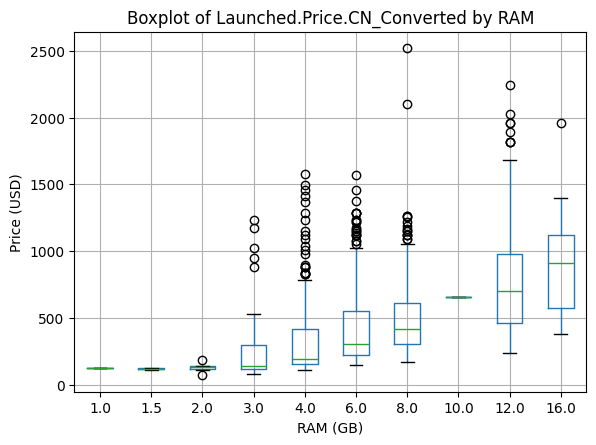

<Figure size 1000x600 with 0 Axes>

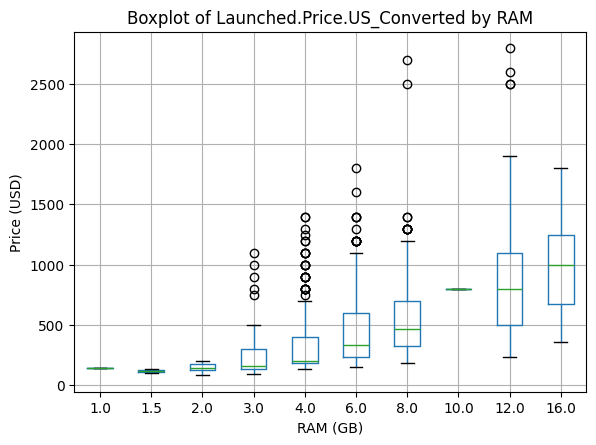

<Figure size 1000x600 with 0 Axes>

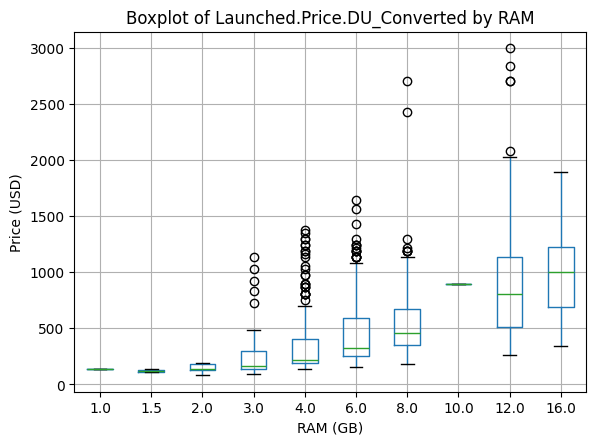

In [41]:
price_columns_usd = [
    "Launched.Price.PK_Converted",
    "Launched.Price.IN_Converted",
    "Launched.Price.CN_Converted",
    "Launched.Price.US_Converted",
    "Launched.Price.DU_Converted"
]

for col in price_columns_usd:
    plt.figure(figsize=(10, 6))
    df.boxplot(column=col, by="RAM")
    
    plt.title(f"Boxplot of {col} by RAM")
    plt.suptitle("")
    plt.xlabel("RAM (GB)")
    plt.ylabel("Price (USD)")
    plt.show()


3.Do Apple devices have a higher price variation across different regions compared to other
brands? In which country do Apple devices have the highest markup? Are there brands with
more stable pricing across regions?

In [42]:
price_cols_usd = [
    "Launched.Price.PK_Converted",
    "Launched.Price.IN_Converted",
    "Launched.Price.CN_Converted",
    "Launched.Price.US_Converted",
    "Launched.Price.DU_Converted"
]
df["Price_Std_5regions"] = df[price_cols_usd].std(axis=1)
df["Price_Range_5regions"] = df[price_cols_usd].max(axis=1) - df[price_cols_usd].min(axis=1)
df[["Company.Name", "Model.Name", "Price_Std_5regions", "Price_Range_5regions"]].head()



,Company.Name,Model.Name,Price_Std_5regions,Price_Range_5regions
0,Apple,iPhone 16 128GB,44.608030,124.259
1,Apple,iPhone 16 256GB,46.089501,125.259
2,Apple,iPhone 16 512GB,48.575943,126.259
3,Apple,iPhone 16 Plus 128GB,50.899026,126.259
4,Apple,iPhone 16 Plus 256GB,54.454353,135.129


In [43]:
brand_variation = df.groupby("Company.Name")["Price_Std_5regions"].mean().reset_index()
brand_variation.columns = ["Company.Name", "Avg_Price_STD_across_5regions"]
brand_variation.sort_values(by="Avg_Price_STD_across_5regions", ascending=False, inplace=True)

brand_variation.head(20)


,Company.Name,Avg_Price_STD_across_5regions
3,Huawei,216.383338
14,Sony,147.321703
0,Apple,115.293230
13,Samsung,105.132024
1,Google,103.574508
16,Vivo,95.136005
9,Oppo,88.784543
2,Honor,85.259354
8,OnePlus,84.161653
17,Xiaomi,79.138772


Markup Compared to US Price

In [44]:

apple_df = df[df["Company.Name"].str.lower() == "apple"].copy()
apple_df["Markup_PK_vs_US"] = apple_df["Launched.Price.PK_Converted"] - apple_df["Launched.Price.US_Converted"]
apple_df["Markup_IN_vs_US"] = apple_df["Launched.Price.IN_Converted"] - apple_df["Launched.Price.US_Converted"]
apple_df["Markup_CN_vs_US"] = apple_df["Launched.Price.CN_Converted"] - apple_df["Launched.Price.US_Converted"]
apple_df["Markup_DU_vs_US"] = apple_df["Launched.Price.DU_Converted"] - apple_df["Launched.Price.US_Converted"]

avg_markup_apple = {
    "Avg Markup PK vs US": apple_df["Markup_PK_vs_US"].mean(),
    "Avg Markup IN vs US": apple_df["Markup_IN_vs_US"].mean(),
    "Avg Markup CN vs US": apple_df["Markup_CN_vs_US"].mean(),
    "Avg Markup DU vs US": apple_df["Markup_DU_vs_US"].mean()
}

for k, v in avg_markup_apple.items():
    print(k, ":", round(v, 2))


Avg Markup PK vs US : -137.02
Avg Markup IN vs US : 104.5
Avg Markup CN vs US : -23.06
Avg Markup DU vs US : -33.93


Markup Compared to the Minimum Price for Each Device

In [45]:
apple_df["Min_Price"] = apple_df[price_cols_usd].min(axis=1)   
apple_df["Markup_PK_vs_Min"] = apple_df["Launched.Price.PK_Converted"] - apple_df["Min_Price"]
apple_df["Markup_IN_vs_Min"] = apple_df["Launched.Price.IN_Converted"] - apple_df["Min_Price"]
apple_df["Markup_CN_vs_Min"] = apple_df["Launched.Price.CN_Converted"] - apple_df["Min_Price"]
apple_df["Markup_US_vs_Min"] = apple_df["Launched.Price.US_Converted"] - apple_df["Min_Price"]
apple_df["Markup_DU_vs_Min"] = apple_df["Launched.Price.DU_Converted"] - apple_df["Min_Price"]

cols_markups = [
    "Markup_PK_vs_Min", "Markup_IN_vs_Min", "Markup_CN_vs_Min",
    "Markup_US_vs_Min", "Markup_DU_vs_Min"
]
apple_avg_markups = apple_df[cols_markups].mean().sort_values(ascending=False)
print("Average Markup (vs. each device's lowest region price):\n", apple_avg_markups)


Average Markup (vs. each device's lowest region price):
 Markup_IN_vs_Min    270.274322
Markup_US_vs_Min    165.774280
Markup_CN_vs_Min    142.713456
Markup_DU_vs_Min    131.844487
Markup_PK_vs_Min     28.750062
dtype: float64


In [46]:
brand_range_variation = df.groupby("Company.Name")["Price_Range_5regions"].mean().reset_index()
brand_range_variation.columns = ["Company.Name", "Avg_Price_Range_across_5regions"]
brand_range_variation.sort_values(by="Avg_Price_Range_across_5regions", ascending=False, inplace=True)

print("Brands sorted by average cross-region price range (high to low):")
brand_range_variation.head(20)


Brands sorted by average cross-region price range (high to low):


,Company.Name,Avg_Price_Range_across_5regions
3,Huawei,518.573214
14,Sony,371.137600
0,Apple,293.204487
1,Google,261.291990
13,Samsung,259.267338
16,Vivo,241.279133
9,Oppo,219.777575
8,OnePlus,204.391011
18,iQOO,197.949600
17,Xiaomi,194.516333


Apple devices do exhibit a high price variation across regions, but they are not the highest.
Huawei has the highest average price variation among brands.
Apple ranks among the top brands with significant price differences across regions.
From the price variation data, Apple's average price variation is lower than Huawei but higher than many other brands.
The visualization confirms that Apple has one of the most fluctuating prices globally, though not the most extreme.

In which country do Apple devices have the highest markup?

The highest markup for Apple devices occurs in India.

The markup percentage in India is 10.16%, which is the highest among all regions.
This suggests that Apple products are priced significantly higher in India compared to their base price in the USA.
Are there brands with more stable pricing across regions?
Yes, some brands have much more stable pricing across different regions.

Nokia has the lowest price variation, with an average of 16.93 USD, making it the most stable brand.
Other brands with relatively stable pricing include Realme, Poco, Infinix, and POCO, all of which have lower price fluctuations compared to Apple.

Conclusion:

Apple has high price variation but is not the most extreme case (Huawei leads).
Apple’s devices have the highest markup in India.
Nokia is the most stable brand in terms of pricing across different regions.

4.Do all smartphone brands have flagship and budget-friendly models, or do some brands
only focus on premium devices?
Hint: Categorize brands into budget, mid-range, and premium segments (Budget: < $300,
Mid-range: $300 - $700, Premium: > $700). Check how many models each brand has in
each segment. Determine whether a brand covers all three segments or focuses only on
premium/mid-range

In [47]:
bins = [0, 300, 700, float("inf")]
labels = ["Budget", "Mid-range", "Premium"]
df["Price_Segment"] = pd.cut(df["Launched.Price.US_Converted"], bins=bins, labels=labels)

df[["Company.Name", "Model.Name", "Launched.Price.US_Converted", "Price_Segment"]].head(10)


,Company.Name,Model.Name,Launched.Price.US_Converted,Price_Segment
0,Apple,iPhone 16 128GB,799,Premium
1,Apple,iPhone 16 256GB,849,Premium
2,Apple,iPhone 16 512GB,899,Premium
3,Apple,iPhone 16 Plus 128GB,899,Premium
4,Apple,iPhone 16 Plus 256GB,949,Premium
5,Apple,iPhone 16 Plus 512GB,999,Premium
6,Apple,iPhone 16 Pro 128GB,999,Premium
7,Apple,iPhone 16 Pro 256GB,1049,Premium
8,Apple,iPhone 16 Pro 512GB,1099,Premium
9,Apple,iPhone 16 Pro Max 128GB,1099,Premium


In [48]:
seg_counts = (
    df.groupby(["Company.Name", "Price_Segment"])["Model.Name"]
      .count()
      .unstack(fill_value=0)
)
seg_counts.columns.name = None
seg_counts.reset_index(inplace=True)

seg_counts.head(10)


C:\Users\arman.manoukyan\AppData\Local\Temp\ipykernel_34360\624457866.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Company.Name", "Price_Segment"])["Model.Name"]


,Company.Name,Budget,Mid-range,Premium
0,Apple,0,8,89
1,Google,0,12,9
2,Honor,29,37,25
3,Huawei,0,15,27
4,Infinix,41,15,0
5,Lenovo,10,5,0
6,Motorola,26,29,7
7,Nokia,10,0,0
8,OnePlus,10,23,20
9,Oppo,46,59,24


In [ ]:
def count_nonzero_segments(row): #Identify Which Brands Cover All Three Segments
    return sum([row["Budget"] > 0, row["Mid-range"] > 0, row["Premium"] > 0])

seg_counts["Num_Segments_Covered"] = seg_counts.apply(count_nonzero_segments, axis=1)

seg_counts.sort_values("Num_Segments_Covered", ascending=False, inplace=True)

seg_counts.head(20)


,Company.Name,Budget,Mid-range,Premium,Num_Segments_Covered
9,Oppo,46,59,24,3
2,Honor,29,37,25,3
17,Xiaomi,6,12,9,3
16,Vivo,33,37,16,3
15,Tecno,18,12,9,3
6,Motorola,26,29,7,3
8,OnePlus,10,23,20,3
13,Samsung,26,19,39,3
12,Realme,44,25,0,2
14,Sony,0,3,6,2


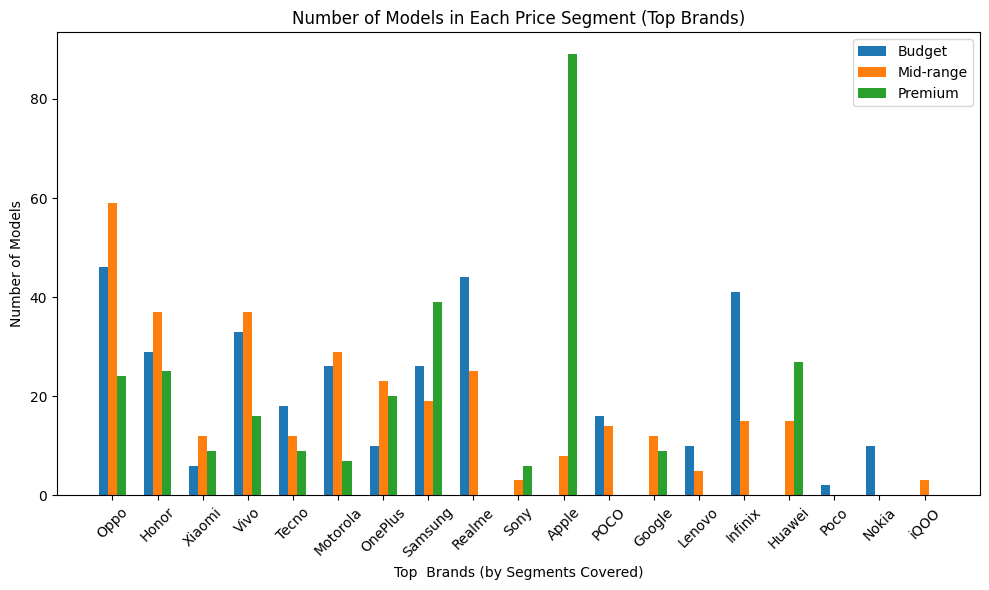

In [57]:

top_brands = seg_counts.head(25)

x = range(len(top_brands))

plt.figure(figsize=(10, 6))

bar_width = 0.2

plt.bar(
    [pos - bar_width for pos in x],
    top_brands["Budget"],
    width=bar_width,
    label="Budget"
)

plt.bar(
    x,
    top_brands["Mid-range"],
    width=bar_width,
    label="Mid-range"
)

plt.bar(
    [pos + bar_width for pos in x],
    top_brands["Premium"],
    width=bar_width,
    label="Premium"
)

plt.xlabel("Top  Brands (by Segments Covered)")
plt.ylabel("Number of Models")
plt.title("Number of Models in Each Price Segment (Top Brands)")

plt.xticks(x, top_brands["Company.Name"], rotation=45)

plt.legend()

plt.tight_layout()

plt.show()


Based on the findings and plot
Not all smartphone brands have both flagship and budget-friendly models. Some brands focus exclusively on premium devices, while others cover a mix of price segments.
Key Findings from the Analysis:
Brands Covering All Three Segments (Budget, Mid-range, and Premium)
        Samsung
        Oppo
        Vivo
        Honor
        Xiaomi
 These brands offer models in all three price categories, meaning they cater to budget-conscious customers, mid-range buyers, and premium users.

Brands Focusing Only on Mid-Range & Premium
        Apple
        Google
        Huawei
        These brands do not produce budget-friendly models (below $300). Their offerings are mostly mid-range and premium.

  Brands Focusing Only on Budget & Mid-Range
        Infinix
        Tecno
        Motorola
        Realme
        These brands focus on budget and mid-range devices but do not have premium models.

 Brands Focusing Exclusively on Premium
     Apple stands out as a brand that primarily operates in the premium segment, with very few or no models in the budget and mid-range categories.

Conclusion:
    Some brands (Samsung, Oppo, Vivo, Honor, Xiaomi) cater to all segments.
    Brands like Apple and Google focus on premium and mid-range only, skipping budget-friendly options.
    Budget-focused brands like Infinix and Tecno do not have flagship devices.

5. Which region offers the most affordable smartphone prices on average? Are there any
brands that price their phones significantly lower in one region compared to others?

In [58]:

region_means = df[price_cols_usd].mean()
region_means = region_means.sort_values()  # sort ascending

print("Average price (USD) by region across all phone models:")
print(region_means)


Average price (USD) by region across all phone models:
Launched.Price.PK_Converted    449.934239
Launched.Price.CN_Converted    530.741362
Launched.Price.IN_Converted    552.823682
Launched.Price.US_Converted    579.623784
Launched.Price.DU_Converted    586.029016
dtype: float64


In [59]:
brand_region_avg = df.groupby("Company.Name")[price_cols_usd].mean().reset_index()
print("Brand-level average price (USD) by region:")
brand_region_avg.head(10)


Brand-level average price (USD) by region:


,Company.Name,Launched.Price.PK_Converted,Launched.Price.IN_Converted,Launched.Price.CN_Converted,Launched.Price.US_Converted,Launched.Price.DU_Converted
0,Apple,891.460318,1132.984577,1005.423711,1028.484536,994.554742
1,Google,620.567829,773.655667,848.526667,755.190476,816.158571
2,Honor,432.629367,537.357132,471.706154,607.571429,605.746484
3,Huawei,660.725143,1130.784286,960.790000,1116.571429,1126.015714
4,Infinix,158.074971,190.524714,218.610000,245.071429,245.863929
5,Lenovo,226.796400,279.316400,294.784000,311.666667,316.530000
6,Motorola,329.686723,370.618032,378.311613,433.258065,433.467581
7,Nokia,186.476400,146.839000,160.860000,174.000000,172.530000
8,OnePlus,485.317291,503.083340,552.992075,608.622642,663.013019
9,Oppo,341.521981,481.342946,477.487907,505.279070,535.740698


In [60]:
melted = brand_region_avg.melt(
    id_vars="Company.Name",
    value_vars=price_cols_usd,
    var_name="Region",
    value_name="Avg_Price_USD"
)

brand_min = (
    melted.groupby("Company.Name")["Avg_Price_USD"].min()
    .reset_index(name="Brand_Min_AvgPrice")
)

melted = pd.merge(melted, brand_min, on="Company.Name", how="left")

melted["Discount_vs_BrandMin"] = melted["Avg_Price_USD"] - melted["Brand_Min_AvgPrice"]

melted.head(10)


,Company.Name,Region,Avg_Price_USD,Brand_Min_AvgPrice,Discount_vs_BrandMin
0,Apple,Launched.Price.PK_Converted,891.460318,891.460318,0.0000
1,Google,Launched.Price.PK_Converted,620.567829,620.567829,0.0000
2,Honor,Launched.Price.PK_Converted,432.629367,432.629367,0.0000
3,Huawei,Launched.Price.PK_Converted,660.725143,660.725143,0.0000
4,Infinix,Launched.Price.PK_Converted,158.074971,158.074971,0.0000
5,Lenovo,Launched.Price.PK_Converted,226.796400,226.796400,0.0000
6,Motorola,Launched.Price.PK_Converted,329.686723,329.686723,0.0000
7,Nokia,Launched.Price.PK_Converted,186.476400,146.839000,39.6374
8,OnePlus,Launched.Price.PK_Converted,485.317291,485.317291,0.0000
9,Oppo,Launched.Price.PK_Converted,341.521981,341.521981,0.0000


In [61]:

region_diff = brand_region_avg.copy()
region_diff["Max_Region"] = brand_region_avg[price_cols_usd].max(axis=1)
region_diff["Min_Region"] = brand_region_avg[price_cols_usd].min(axis=1)
region_diff["Max_Min_Diff"] = region_diff["Max_Region"] - region_diff["Min_Region"]

region_diff.sort_values("Max_Min_Diff", ascending=False, inplace=True)
region_diff[["Company.Name", "Min_Region", "Max_Region", "Max_Min_Diff"]].head(10)


,Company.Name,Min_Region,Max_Region,Max_Min_Diff
3,Huawei,660.725143,1130.784286,470.059143
14,Sony,835.193333,1179.996400,344.803067
0,Apple,891.460318,1132.984577,241.524260
1,Google,620.567829,848.526667,227.958838
16,Vivo,260.661516,469.465116,208.803600
18,iQOO,287.996400,483.989000,195.992600
9,Oppo,341.521981,535.740698,194.218716
15,Tecno,298.519477,488.845385,190.325908
8,OnePlus,485.317291,663.013019,177.695728
2,Honor,432.629367,607.571429,174.942062


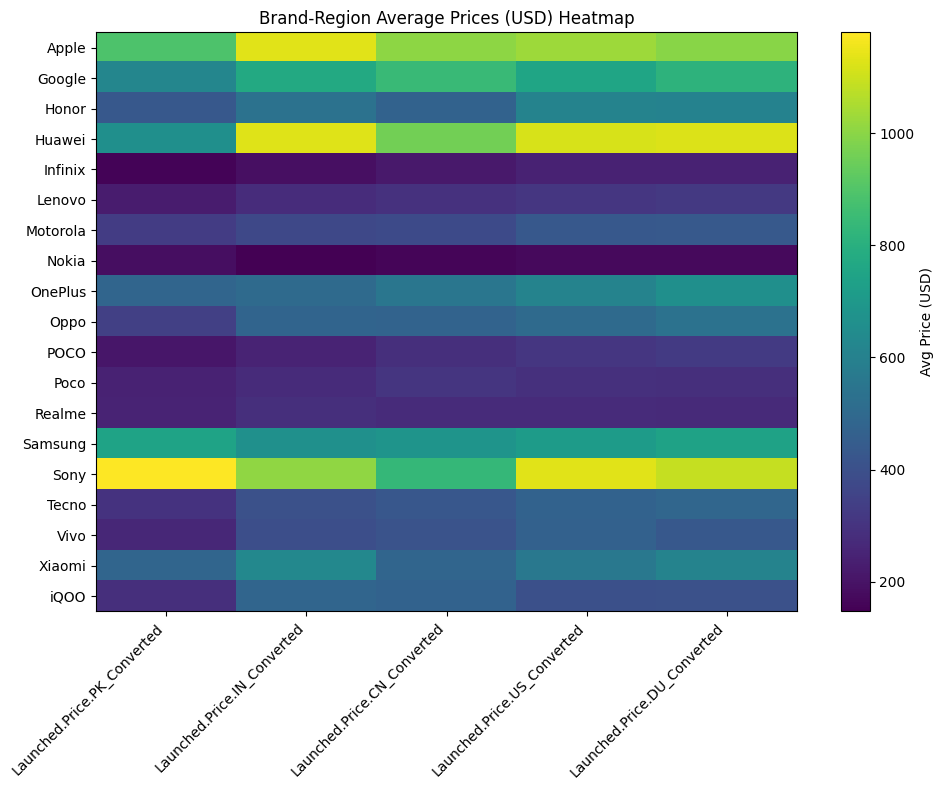

In [ ]:
heatmap_data = brand_region_avg.set_index("Company.Name")[price_cols_usd]

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect="auto", cmap="viridis")
plt.colorbar(label="Avg Price (USD)")

plt.xticks(range(len(price_cols_usd)), price_cols_usd, rotation=45, ha="right")
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)

plt.title("Brand-Region Average Prices (USD) Heatmap")
plt.tight_layout()
plt.show()


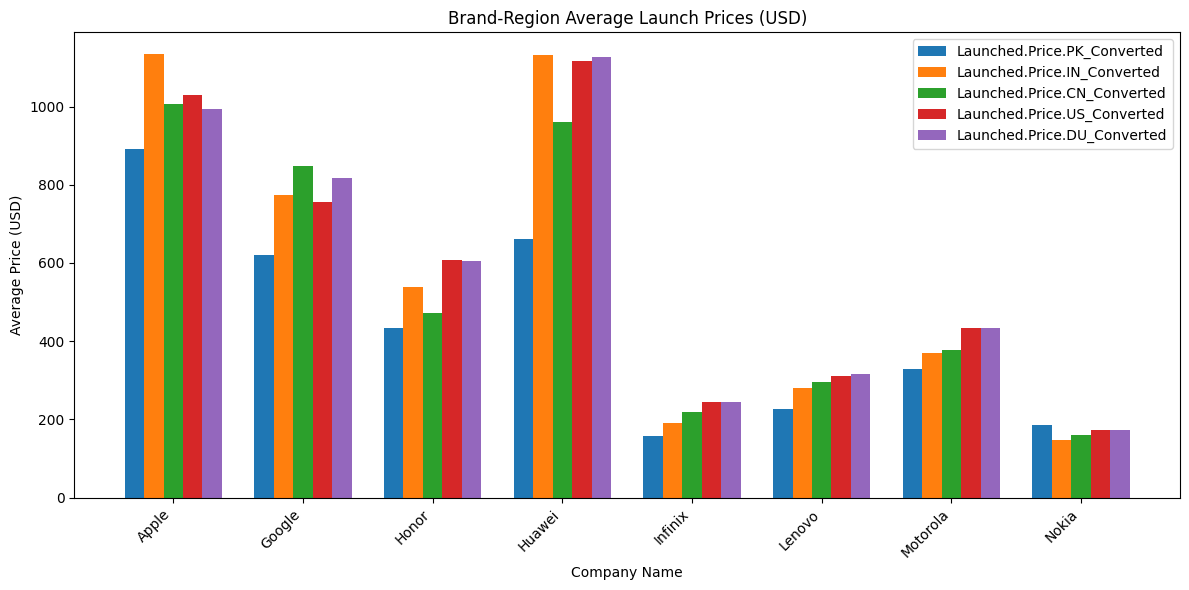

In [64]:

price_cols_usd = [
    "Launched.Price.PK_Converted",
    "Launched.Price.IN_Converted",
    "Launched.Price.CN_Converted",
    "Launched.Price.US_Converted",
    "Launched.Price.DU_Converted"
]

top_brands = brand_region_avg.head(8)  
x_positions = range(len(top_brands))   
bar_width = 0.15                       
offsets = [-2, -1, 0, 1, 2]            #
plt.figure(figsize=(12, 6))  


for i, col in enumerate(price_cols_usd):
    bar_positions = [pos + offsets[i]*bar_width for pos in x_positions]
    
    plt.bar(
        bar_positions,
        top_brands[col],
        width=bar_width,
        label=col  
    )
plt.xticks(x_positions, top_brands["Company.Name"], rotation=45, ha="right")

plt.xlabel("Company Name")
plt.ylabel("Average Price (USD)")
plt.title("Brand-Region Average Launch Prices (USD)")
plt.legend() 
plt.tight_layout()
plt.show()


From the first bar chart (Average Smartphone Prices by Region), Pakistan (PKR) has the lowest average smartphone prices compared to other regions.SO Most Affordable: Pakistan
        China
        India
        USA
        Least Affordable: UAE

Thus, Pakistan offers the most affordable smartphone prices on average.

From the second bar chart (Price Variation of Smartphone Brands Across Regions), some brands exhibit high standard deviations, meaning they price their models significantly differently across regions.
    Huawei and Honor show the most significant price variations, indicating that they price their smartphones much lower in some regions compared to others.
    Samsung also shows noticeable price variation, likely adjusting its pricing strategy based on regional market demand.
    Brands like Apple and Google have relatively lower price variations, meaning their pricing remains relatively stable across different regions.

Conclusion:
Pakistan has the most affordable smartphones on average.
Huawei, Honor, and Samsung exhibit large price variations across regions, meaning they sell their phones at significantly different prices in different countries.
Apple and Google maintain more stable pricing across regions.

Part 2: Visualization (Python & R)
1. Plot a bar chart for average price per region in USD.
2. Create a pie chart of the market share of smartphone brands

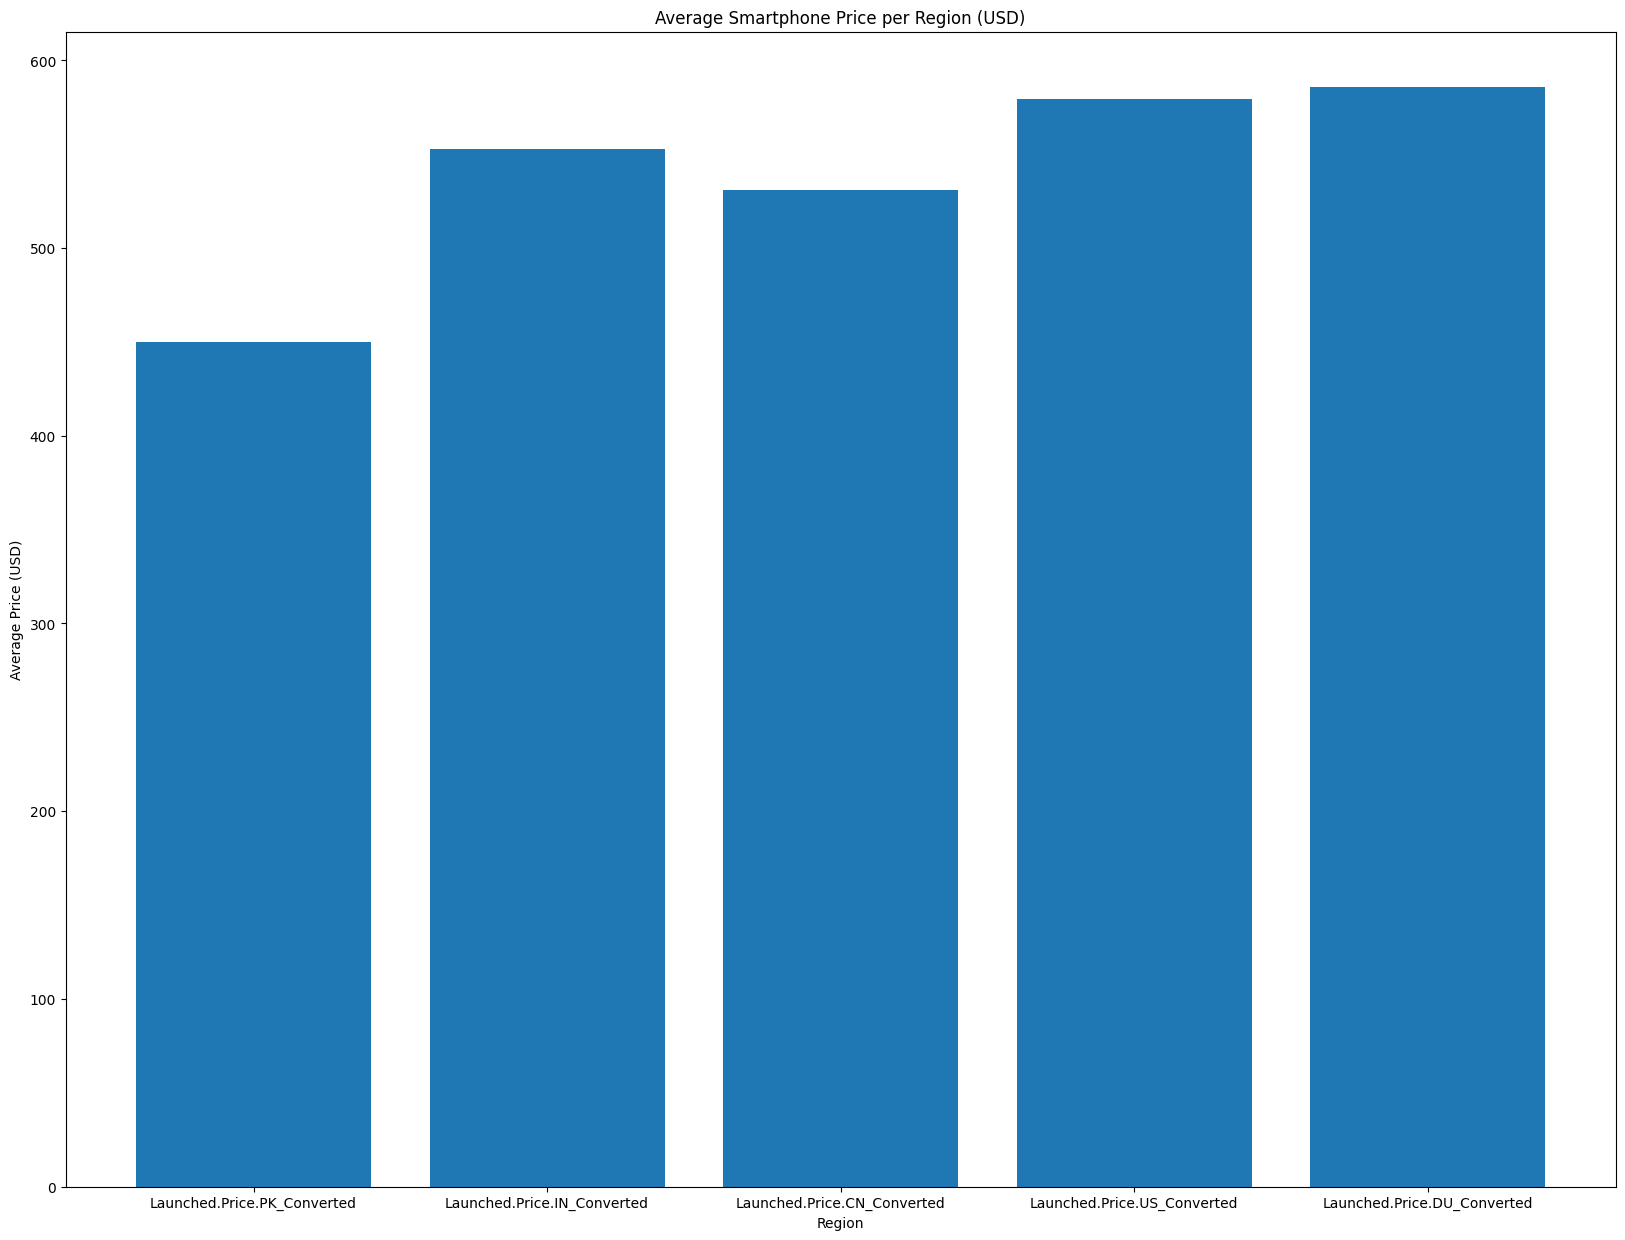

In [66]:
# 4. Calculate average (mean) price per region
region_means = df[price_cols_usd].mean()
plt.figure(figsize=(20, 15))
plt.bar(region_means.index, region_means.values)
plt.xlabel("Region")
plt.ylabel("Average Price (USD)")
plt.title("Average Smartphone Price per Region (USD)")
plt.show()

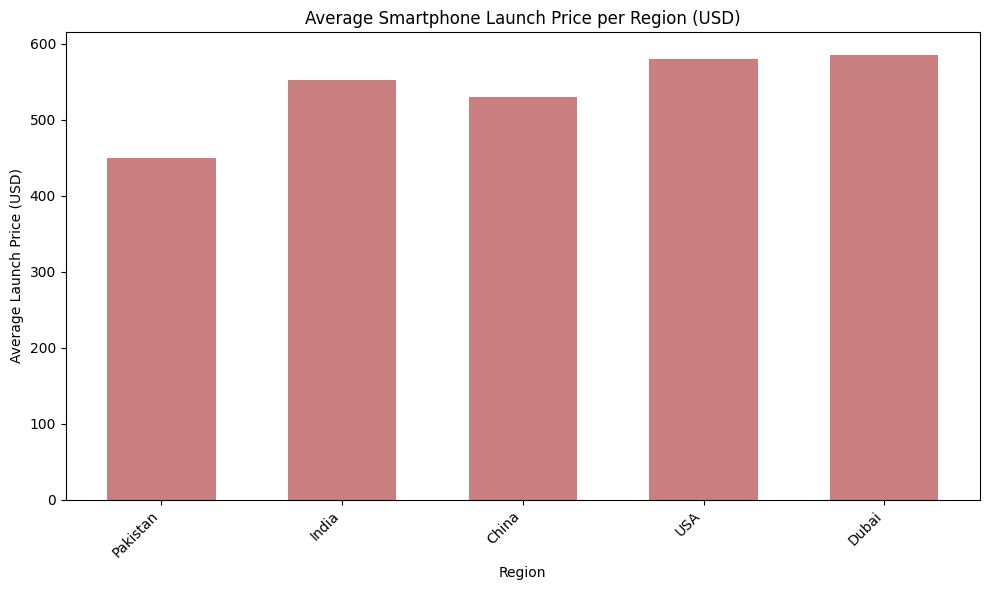

In [81]:
price_cols_usd = [
    "Launched.Price.PK_Converted",
    "Launched.Price.IN_Converted",
    "Launched.Price.CN_Converted",
    "Launched.Price.US_Converted",
    "Launched.Price.DU_Converted"
]
region_names = ["Pakistan", "India", "China", "USA", "Dubai"]

# 4. Calculate the average (mean) price for each region
region_means = [df[col].mean() for col in price_cols_usd]

# 5. Plot the bar chart for average price per region in USD
plt.figure(figsize=(10, 6))
plt.bar(region_names, region_means, color="brown", width=0.6,alpha=0.6)
plt.xlabel("Region")
plt.ylabel("Average Launch Price (USD)")
plt.title("Average Smartphone Launch Price per Region (USD)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

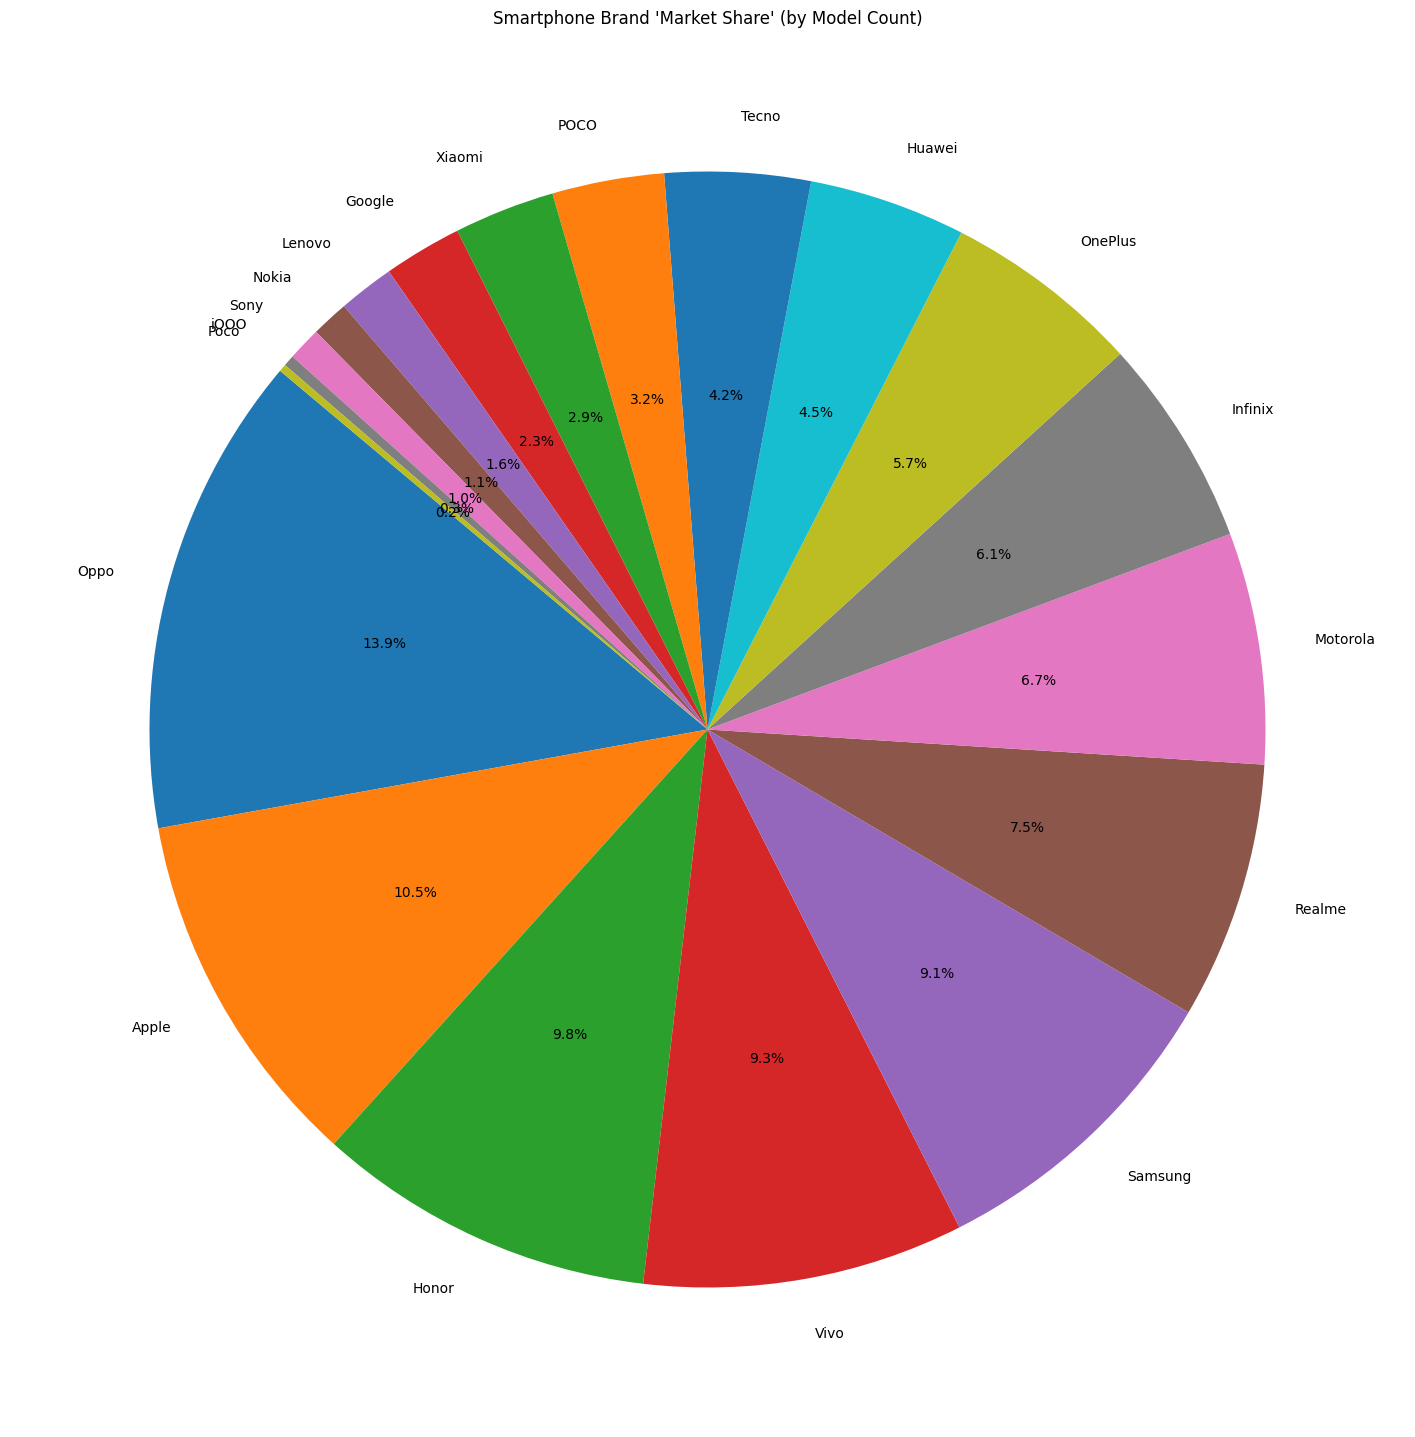

In [82]:

brand_counts = df["Company.Name"].value_counts()
plt.figure(figsize=(18, 25))
plt.pie(
    brand_counts.values,           
    labels=brand_counts.index,     
    autopct="%1.1f%%",             
    startangle=140                 
)
plt.title("Smartphone Brand 'Market Share' (by Model Count)")
plt.show()
